In [1]:
#import main librraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#metrics
from sklearn import metrics
#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#dimention increasing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
#import dataset
data=pd.read_csv('diamonds.csv')

info about columns
Diamond weight in carat	carat
diamond cutting quality	cut
diamond color from J (worst) to D (best)	color
A measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)	clarity
diamond length in mm	x
diamond width in mm	y
diamond depth in mm	z
Percentage depth that is equal to z / mean(x,y)	depth
The width of the widest point at the top of the diamond	table
diamond price	price [target variable]

In [3]:
#change to dataframe
df = pd.DataFrame(data)

In [4]:
#look at the first 10 rows of data
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
#look at the last rows of data
df.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
49990,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
49991,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
49992,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
49993,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
49994,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
#get info about dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [7]:
#look at the the number of rows and columns so 10 columns and 50000 rows
df.shape

(50000, 10)

In [8]:
#look at the type of df
type(df)

pandas.core.frame.DataFrame

In [9]:
#lets look unique values of some categorical values
columns_of_interest = ['cut', 'color', 'clarity','carat']  # Add your categorical column names here

unique_values = df[columns_of_interest].apply(lambda x: x.unique())
print(unique_values)

cut                  [Ideal, Premium, Good, Very Good, Fair]
color                                  [E, I, J, H, F, G, D]
clarity             [SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF]
carat      [0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3...
dtype: object


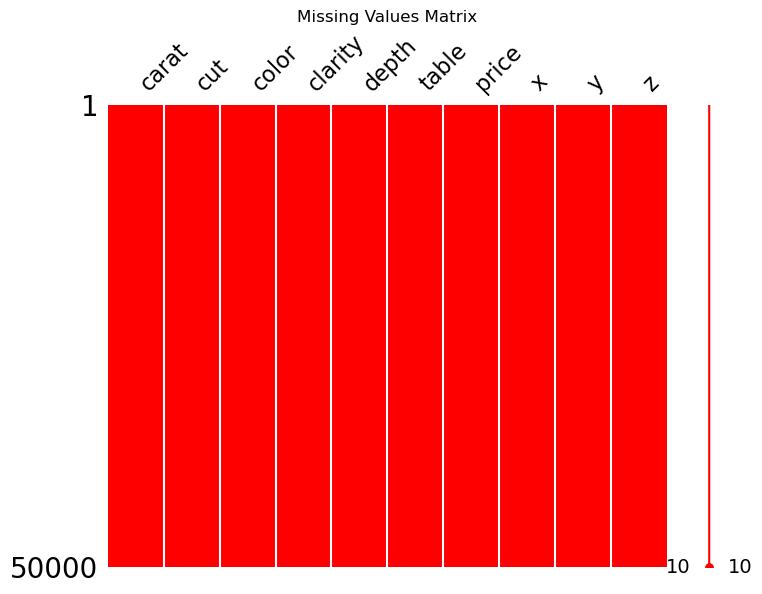

In [10]:
#look at missing values
import missingno as msn
msn.matrix(df, figsize=(8, 6), color=(1, 0, 0))  # Setting a custom color
plt.title('Missing Values Matrix')
plt.show()

In [11]:
#look at the count of missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

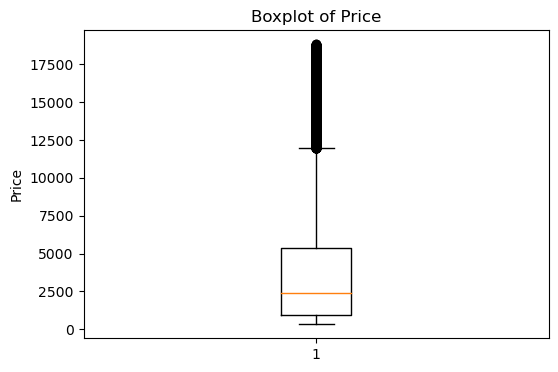

In [12]:
# Visualizing outliers using a boxplot
plt.figure(figsize=(6, 4))
plt.title('Boxplot of Price')
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.show()

In [13]:
#look at duplicate values
df.duplicated().sum()

126

In [14]:
#drop duplicate values
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [15]:
#encode categorical values since the columns are ordinal
label_encoder = LabelEncoder()
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])


In [16]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


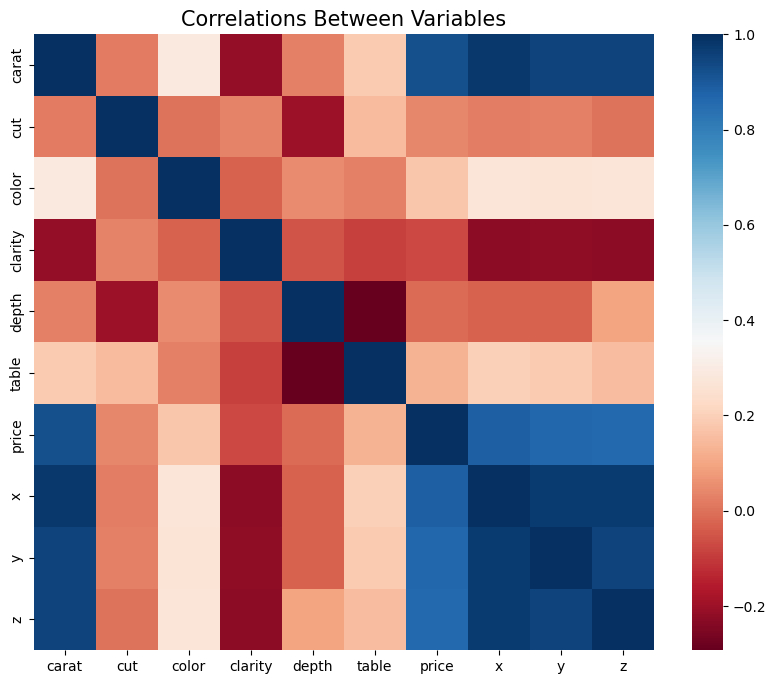

In [17]:
#Visualizing the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

#Visualizing the Correlation between the numerical variables using pairplot visualization
cols=['carat','cut','color','clarity','depth','table','price','x','y','z']
sns.pairplot(df[cols])

In [18]:
#split data to X-features and Y-predictor
X = df.drop("price", axis=1)
y = df["price"]

In [19]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
49996,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
49997,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
49998,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [20]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 50000, dtype: int64

In [21]:
#split test train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#do scaling
scaler = StandardScaler()
scaler.fit(x_train)  
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [23]:
#linear regression
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

In [24]:
#predicting
y_pred = reg.predict(scaled_x_test)

In [25]:
linear_score = metrics.r2_score(y_test, y_pred)

In [26]:
#create function for metrics
def Evaluation(x_test, y_test, model) :
    y_pred = model.predict(x_test)    
    mse = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)

In [27]:
Evaluation(scaled_x_test, y_test, reg)

mean_absolute_error :  848.4825195018111
mean_squared_error  :  1742507.7430392727
root_mean_absolute_error 1320.040811126411
R2_score            :  0.8872658964238789


In [28]:
#write function to compare actual and prediction scores
def compare(y_test, y_pred):
    compare = pd.DataFrame()
    compare["Actual"] = y_test
    compare["Predict"] = y_pred
    compare["compare"] = abs(y_test-y_pred)
    return compare

In [29]:
compare(y_test,y_pred)

,Actual,Predict,compare
33553,931,1001.354717,70.354717
9427,4744,3951.753704,792.246296
199,2781,2653.824259,127.175741
12447,5531,6381.034441,850.034441
39489,505,142.909690,362.090310
...,...,...,...
28567,742,881.449614,139.449614
25079,645,664.637906,19.637906
18707,8654,8868.578921,214.578921
15200,6569,6313.769533,255.230467


Text(0, 0.5, 'y_pred')

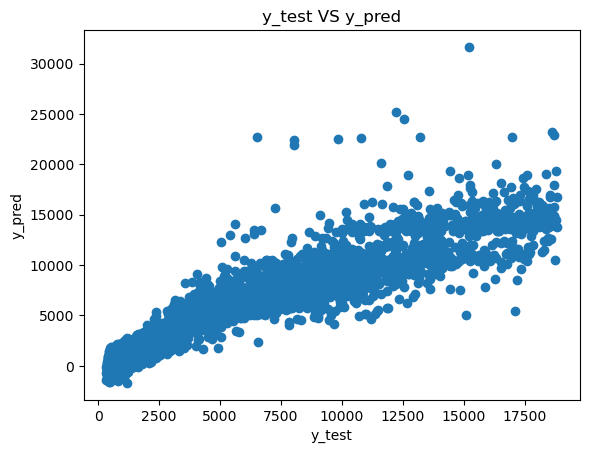

In [30]:
#visualize predictions of y_test and y_pred
plt.scatter(y_test, y_pred)
plt.title("y_test VS y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

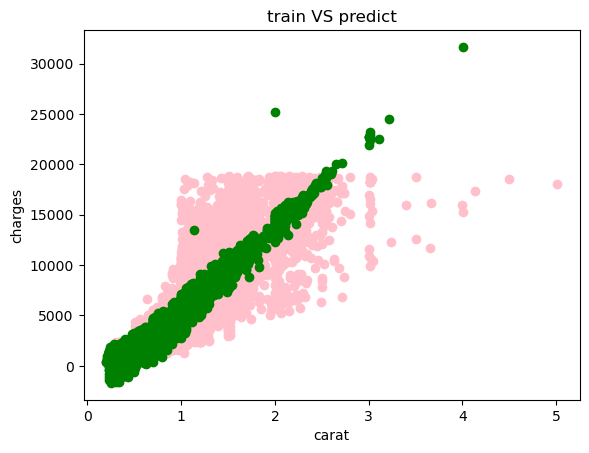

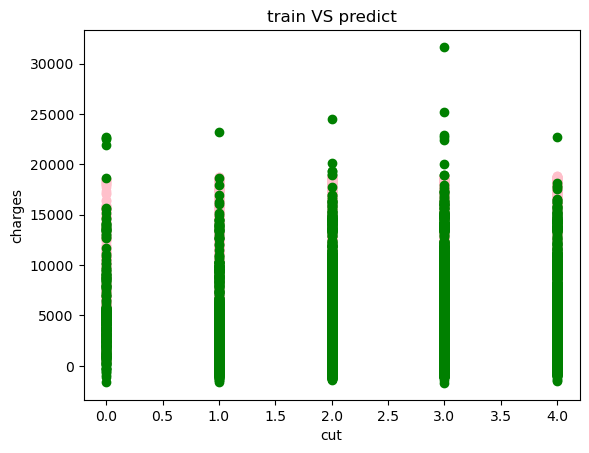

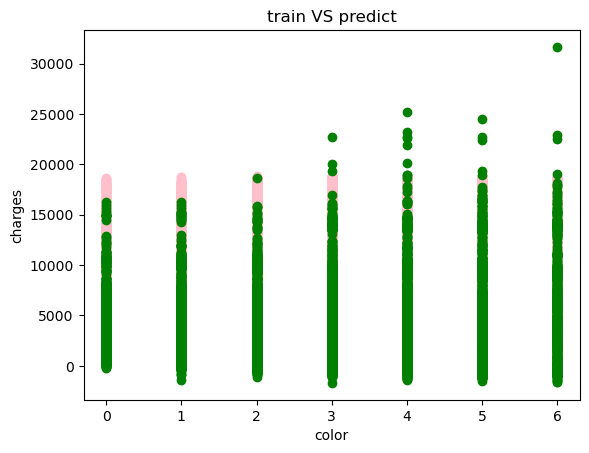

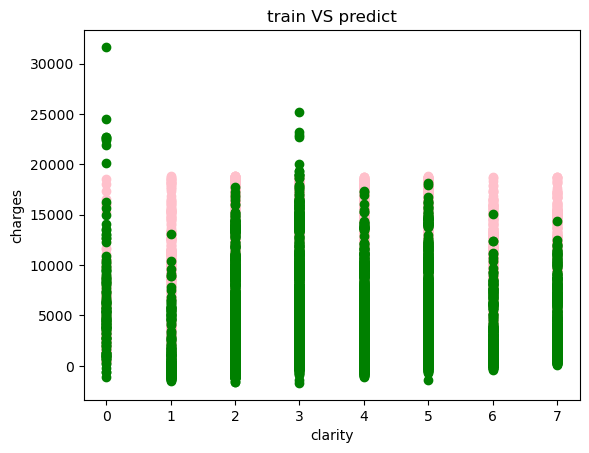

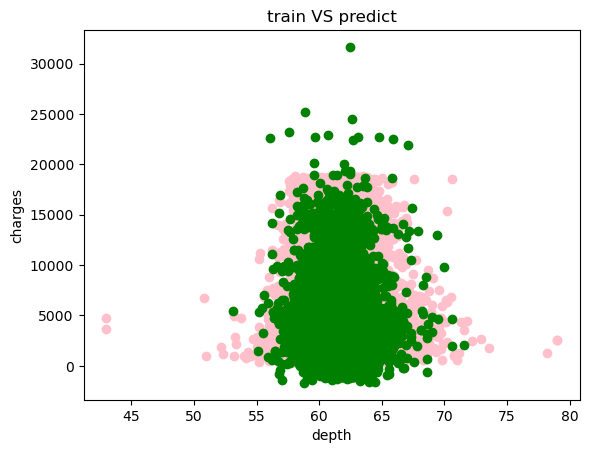

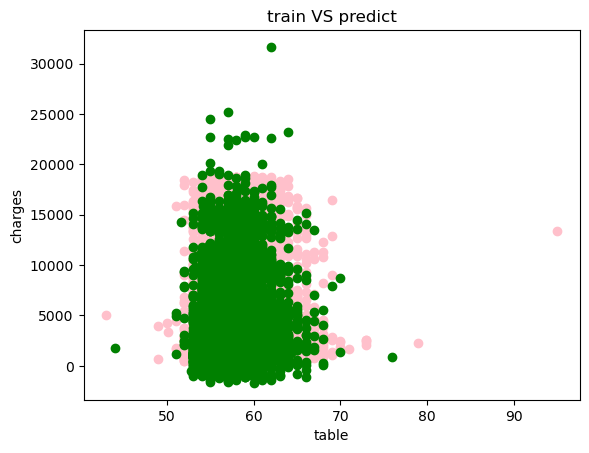

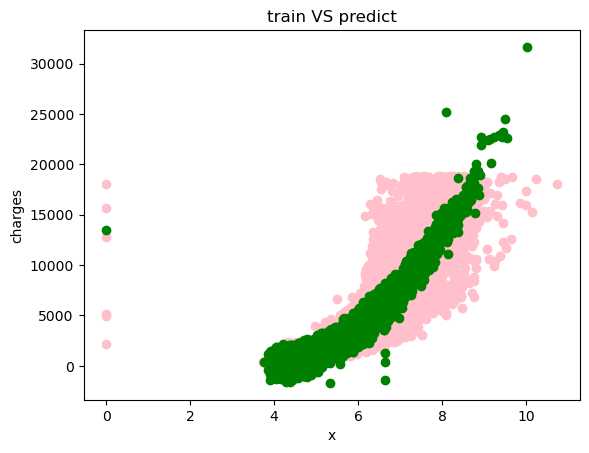

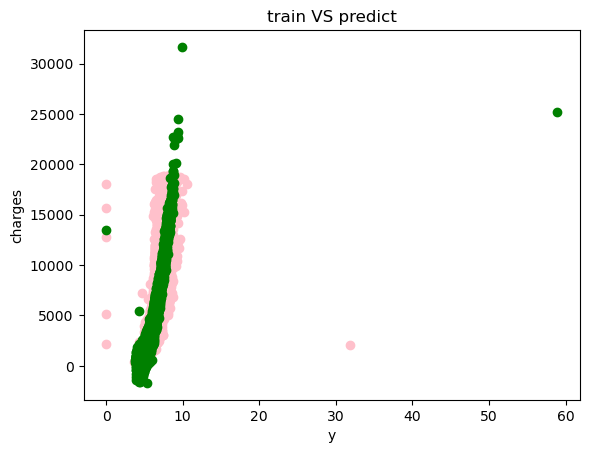

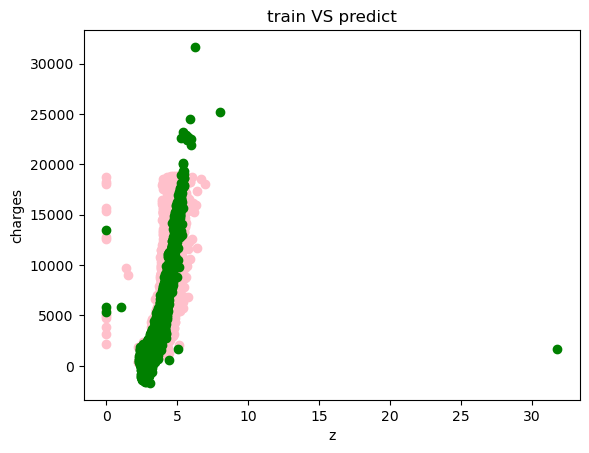

In [31]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="pink")
    plt.scatter(x_test[i], y_pred, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

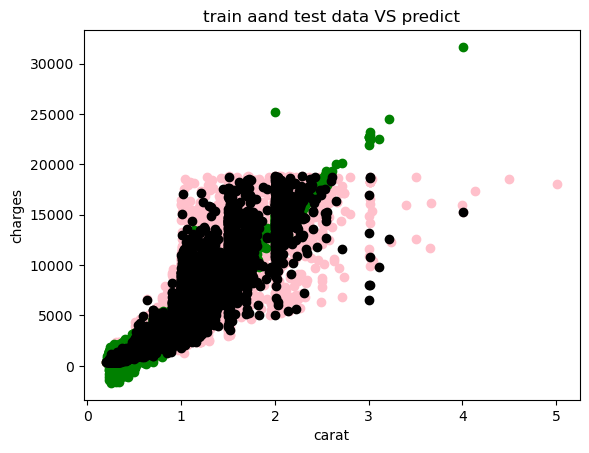

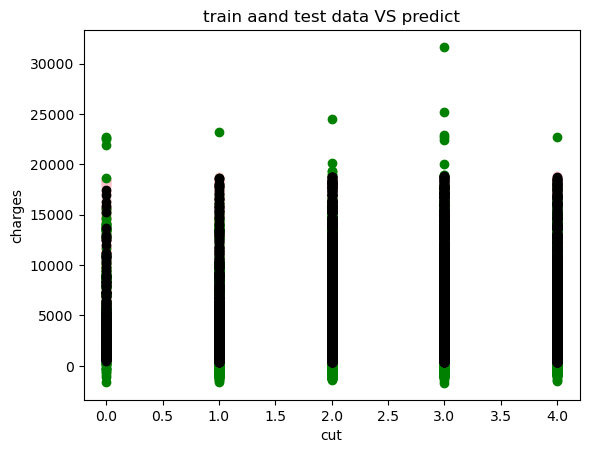

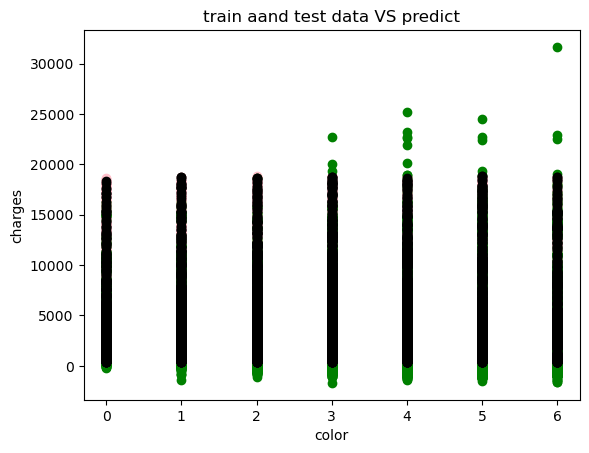

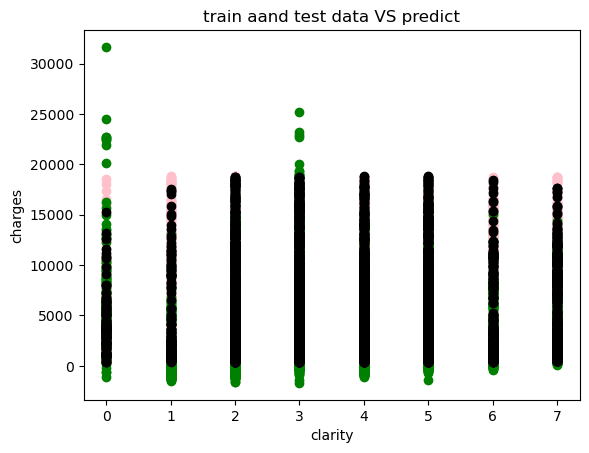

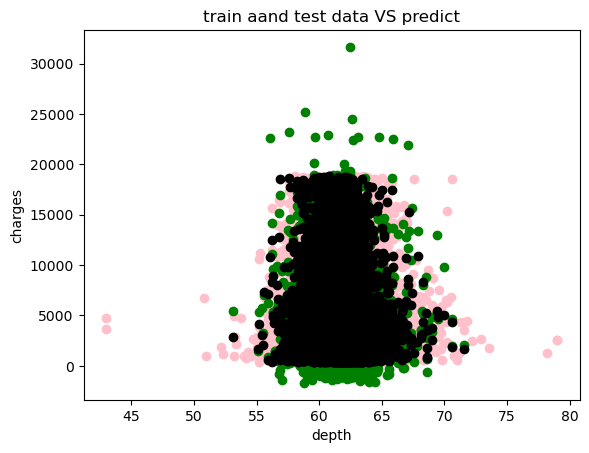

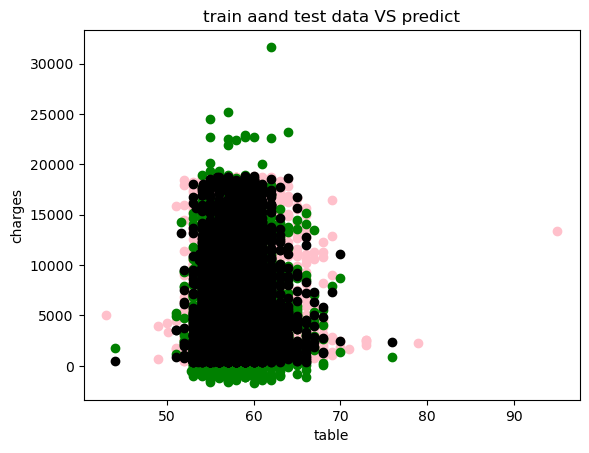

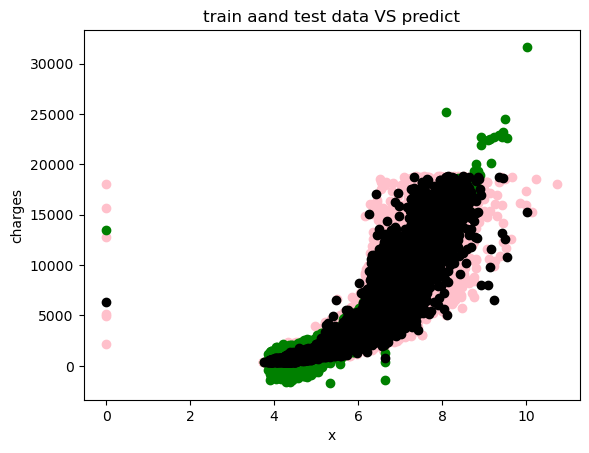

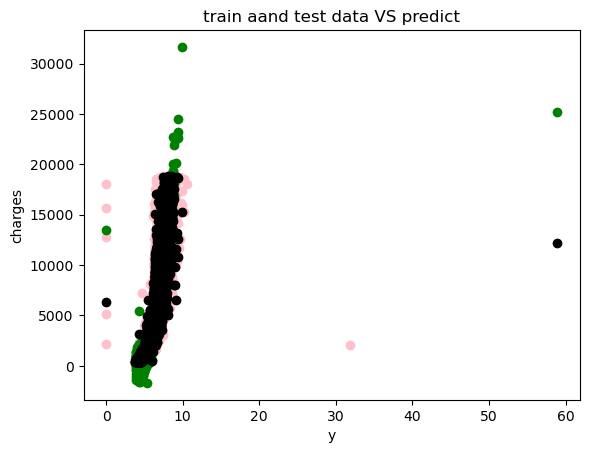

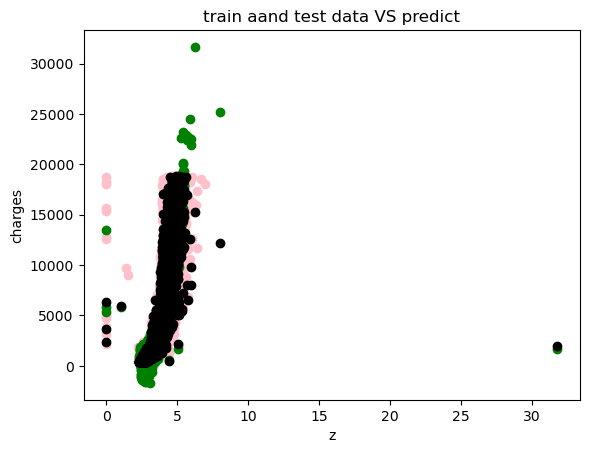

In [32]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="pink")
    plt.scatter(x_test[i], y_pred, color="green")
    plt.scatter(x_test[i], y_test, color="black")
    plt.title("train aand test data VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

In [33]:
#check using cross-validation
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(reg, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.88639027 0.87101993 0.88229819]
mean of all scores is :  0.8799027953758176


In [34]:
kfold = KFold(n_splits=3, shuffle=True)
result = cross_val_score(reg, scaled_x_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.88576461 0.88306639 0.88246425]
mean of all scores is :  0.883765086772088


Polynomial Regression


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [36]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
alpha = 10**np.linspace(10,-2,100)*0.5 

In [38]:
ridge_cv = RidgeCV(alphas=alpha, scoring="neg_mean_squared_error", cv=10)
ridge_cv.fit(x_train_scaled, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [39]:
print( "alpha value : ", ridge_cv.alpha_)    

alpha value :  16.372745814388658


In [40]:
#evaluation
Evaluation(x_train_scaled, y_train, ridge_cv)

mean_absolute_error :  867.5987904912099
mean_squared_error  :  1854751.8835294535
root_mean_absolute_error 1361.8927577197308
R2_score            :  0.8842659029426903


In [41]:
Evaluation(x_test_scaled, y_test, ridge_cv)

mean_absolute_error :  861.9386652906438
mean_squared_error  :  1781992.5655792947
root_mean_absolute_error 1334.9129430713056
R2_score            :  0.8878075346066945


In [42]:
#predict
y_pred_ridge = ridge_cv.predict(x_test_scaled)

In [43]:
ridge_score = metrics.r2_score(y_test, y_pred_ridge)
ridge_score

0.8878075346066945

In [44]:
compare(y_test, y_pred_ridge)

,Actual,Predict,compare
11841,5347,6299.136524,952.136524
19602,9333,7293.548775,2039.451225
45519,2066,4700.821662,2634.821662
25747,648,194.947425,453.052575
42642,1728,1830.980749,102.980749
...,...,...,...
38344,1221,2030.348048,809.348048
49984,2755,3509.133081,754.133081
32624,891,-680.384393,1571.384393
46437,2211,3339.852617,1128.852617


Text(0.5, 0, 'y_test')

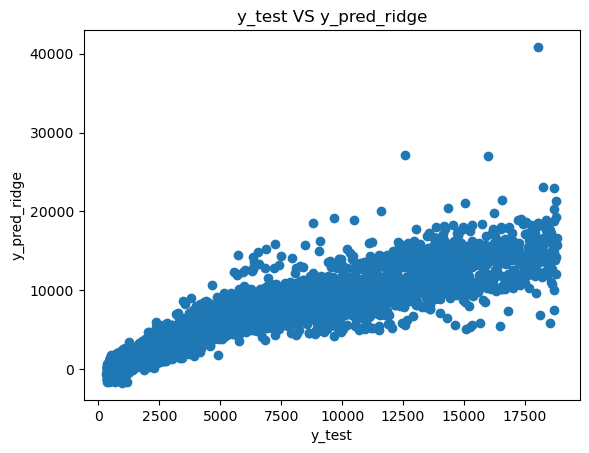

In [45]:
plt.scatter(y_test, y_pred_ridge)
plt.title("y_test VS y_pred_ridge")
plt.ylabel("y_pred_ridge")
plt.xlabel("y_test")

lasso

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [47]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [48]:
lasso_cv = LassoCV(n_alphas=100, max_iter=1000, cv=10)
lasso_cv.fit(x_train_scaled, y_train)

LassoCV(cv=10)

In [49]:
lasso_cv.alpha_

3.6899059416030457

In [50]:
#evaluation
Evaluation(x_test_scaled, y_test, lasso_cv)

mean_absolute_error :  864.2639284021432
mean_squared_error  :  1785244.0155242148
root_mean_absolute_error 1336.1302389827927
R2_score            :  0.8876028265779015


In [51]:
Evaluation(x_train_scaled, y_train, lasso_cv)

mean_absolute_error :  869.8576005796533
mean_squared_error  :  1855893.950052084
root_mean_absolute_error 1362.3119870470507
R2_score            :  0.8841946394820895


In [52]:
#predict
y_pred_lasso = lasso_cv.predict(x_test_scaled)

In [53]:
lasso_score = metrics.r2_score(y_test, y_pred_lasso)
lasso_score

0.8876028265779015

In [54]:
#compare
compare(y_test, y_pred_lasso)

,Actual,Predict,compare
11841,5347,6318.241747,971.241747
19602,9333,7303.344829,2029.655171
45519,2066,4732.354242,2666.354242
25747,648,180.680892,467.319108
42642,1728,1851.633980,123.633980
...,...,...,...
38344,1221,2022.806701,801.806701
49984,2755,3519.760122,764.760122
32624,891,-697.620162,1588.620162
46437,2211,3332.359821,1121.359821


Text(0.5, 0, 'y_test')

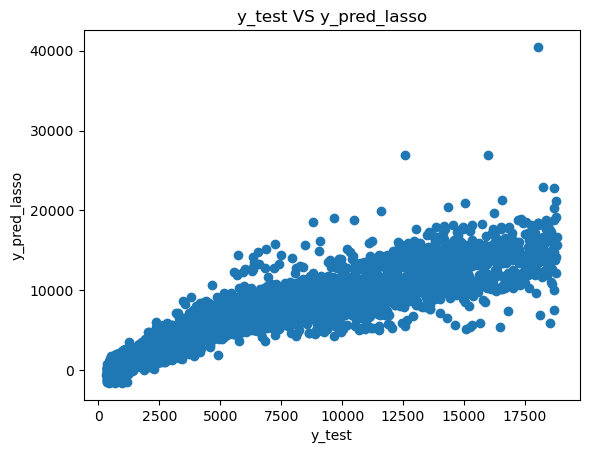

In [55]:
plt.scatter(y_test, y_pred_lasso)
plt.title("y_test VS y_pred_lasso")
plt.ylabel("y_pred_lasso")
plt.xlabel("y_test")

elastic net

In [56]:
#split test train
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
#do sclaing
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
#make model
elasticnet_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.01, n_alphas=100, max_iter=1000)
elasticnet_cv.fit(x_train_scaled, y_train)

ElasticNetCV(eps=0.01, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [59]:
elasticnet_cv.alpha_

36.89905941603046

In [60]:
#evaluation
Evaluation(x_test_scaled, y_test, elasticnet_cv)

mean_absolute_error :  913.2212548421879
mean_squared_error  :  1875563.5852389578
root_mean_absolute_error 1369.5121705333465
R2_score            :  0.8819163970184912


In [61]:
Evaluation(x_train_scaled, y_train, elasticnet_cv)

mean_absolute_error :  918.8984144834446
mean_squared_error  :  1934850.6945030524
root_mean_absolute_error 1390.9891065364432
R2_score            :  0.8792678416679104


In [62]:
#predict
y_pred_elastic = elasticnet_cv.predict(x_test_scaled)

In [63]:
elastic_score = metrics.r2_score(y_test, y_pred_elastic)
elastic_score

0.8819163970184912

In [64]:
#compare
compare(y_test, y_pred_elastic)

,Actual,Predict,compare
11841,5347,6511.037933,1164.037933
19602,9333,7392.583180,1940.416820
45519,2066,5031.390640,2965.390640
25747,648,43.417814,604.582186
42642,1728,2075.622922,347.622922
...,...,...,...
38344,1221,1950.799591,729.799591
49984,2755,3641.319243,886.319243
32624,891,-859.194126,1750.194126
46437,2211,3256.262071,1045.262071


Text(0.5, 0, 'y_test')

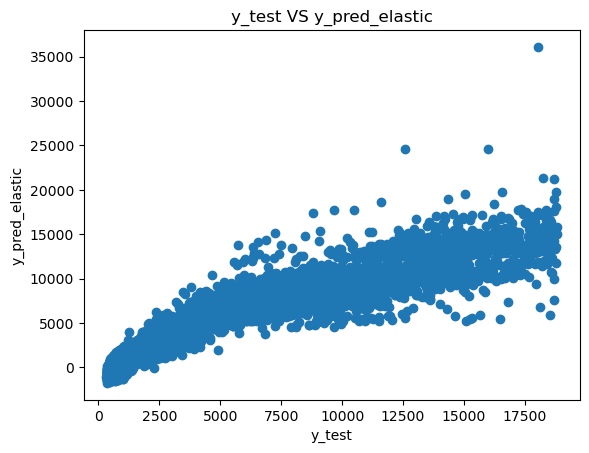

In [65]:
plt.scatter(y_test, y_pred_elastic)
plt.title("y_test VS y_pred_elastic")
plt.ylabel("y_pred_elastic")
plt.xlabel("y_test")

A Decision Tree algorithm is one of the most popular machine learning algorithms. It is a supervised learning algorithm which can be used for both Calssification and Regression datasets. Decision tree includes 3 parts such as a root node, branches, and leaf nodes. Also there could be internal node which are attributes.

In [66]:
#split test train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
#create model
DTs_reg = DecisionTreeRegressor()
DTs_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [68]:
#evaluate
Evaluation(x_train, y_train, DTs_reg)

mean_absolute_error :  0.33534285714285716
mean_squared_error  :  59.16381428571429
root_mean_absolute_error 7.691801758087261
R2_score            :  0.9999963082551981


In [69]:
Evaluation(x_test, y_test, DTs_reg)

mean_absolute_error :  371.4226
mean_squared_error  :  581238.9580333333
root_mean_absolute_error 762.3902924574351
R2_score            :  0.9634057779229865


In [70]:
#cross validation
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(DTs_reg, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [ 0.48065126  0.52512197  0.52111483  0.43985621  0.38174434  0.9562341
 -0.57784644 -0.3126885   0.04378005  0.29933276]
mean of all scores is :  0.2757300590714838


In [71]:
#improve model
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter = ["best", "random"]
max_depth = range(3,21)
random_state =range(1,8)

params = {"splitter":splitter, "max_depth":max_depth, "random_state":random_state}

DTs_grid = GridSearchCV(DTs_reg, param_grid=params,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

DTs_grid.fit(x_train_scaled, y_train)


print('best parameters:',DTs_grid.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 11, 'random_state': 1, 'splitter': 'best'}


In [72]:
#build new model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
DTs_reg = DecisionTreeRegressor(max_depth= 3, random_state= 7, splitter= 'best', criterion="squared_error")
DTs_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=7)

In [74]:
Evaluation(x_train, y_train, DTs_reg)

mean_absolute_error :  772.445421489406
mean_squared_error  :  1871676.7760280578
root_mean_absolute_error 1368.092385779578
R2_score            :  0.8832098117379785


In [75]:
Evaluation(x_test, y_test, DTs_reg)

mean_absolute_error :  778.7277599544803
mean_squared_error  :  1887085.6979764986
root_mean_absolute_error 1373.7123781842029
R2_score            :  0.8811909763520227


In [76]:
#predict
y_pred_DTs = DTs_reg.predict(x_test)

In [77]:
DTs_score = metrics.r2_score(y_test, y_pred_DTs)
DTs_score

0.8811909763520227

Text(0.5, 0, 'y_test')

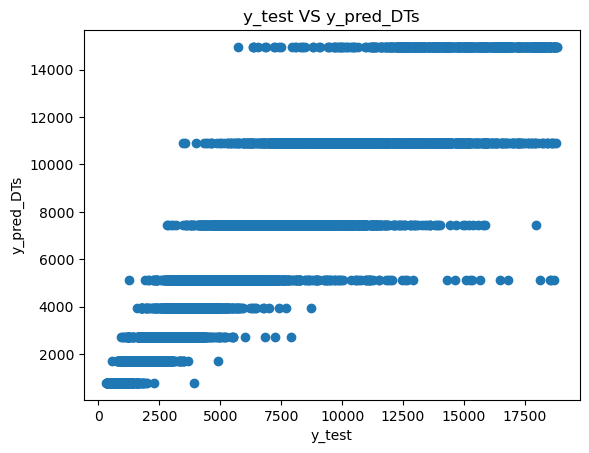

In [78]:
#compare
plt.scatter(y_test, y_pred_DTs)
plt.title("y_test VS y_pred_DTs")
plt.ylabel("y_pred_DTs")
plt.xlabel("y_test")

random forest regressor


In [79]:
#split test train
x_train , x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [80]:
#create model
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [81]:
#evaluate
Evaluation(x_train, y_train, random_forest)

mean_absolute_error :  102.38511733741497
mean_squared_error  :  42897.43916420823
root_mean_absolute_error 207.1169697639675
R2_score            :  0.9973232557778601


In [82]:
Evaluation(x_test, y_test, random_forest)

mean_absolute_error :  275.52531166825395
mean_squared_error  :  299597.23830673954
root_mean_absolute_error 547.3547645784583
R2_score            :  0.9811376582372374


In [83]:
#evaluate k fold
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(random_forest, X, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.66475848 0.75386707 0.72885277 0.69550769 0.6148141  0.96433465
 0.07334886 0.24530304 0.48123669 0.61020018]
mean of all scores is :  0.5832223540910083


In [84]:
#improve model and evaluation
n_estimators = (100,200)
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
max_depth = range(3,21)
random_state =range(1,8)

params = {"max_depth":max_depth, "random_state":random_state, "n_estimators":n_estimators}

RF_grid = GridSearchCV(random_forest, param_grid=params,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

RF_grid.fit(x_train, y_train)


print('best parameters:',RF_grid.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 14, 'n_estimators': 200, 'random_state': 5}


# using squared_error as criterion

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="squared_error", random_state=5)
random_forest.fit(x_train, y_train)
Evaluation(x_test, y_test, random_forest)

# using squared_error as friedman_mse

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="friedman_mse", random_state=5)
random_forest.fit(x_train, y_train)
evaliuation(x_test, y_test, random_forest)

# using squared_error as absolute_error

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="absolute_error", random_state=5)
random_forest.fit(x_train, y_train)
evaliuation(x_test, y_test, random_forest)

# using squared_error as poisson

random_forest = RandomForestRegressor(n_estimators=200, max_depth=4, criterion="poisson", random_state=5)
random_forest.fit(x_train, y_train)
evaliuation(x_test, y_test, random_forest)

k nearest neighbours 
Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

In [85]:
#split test train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
#do scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [87]:
def Best_knn(k_neighbors):

    training_accuracy = []
    testing_accuracy = []

    for k in range(1,k_neighbors) : 
        knn_model = KNeighborsRegressor(n_neighbors=k)
        knn_model.fit(x_train_scaled, y_train)
        training_accuracy.append(knn_model.score(x_train_scaled, y_train))
        testing_accuracy.append(knn_model.score(x_test_scaled, y_test)) 
        
    plt.plot(range(1,k_neighbors), training_accuracy, label="training accuracy")
    plt.plot(range(1,k_neighbors), testing_accuracy, label="testing accuracy") 
    plt.ylabel("Accuracy")
    plt.xlabel("numbers of neighbors")
    plt.grid()
    plt.legend()
    plt.show()

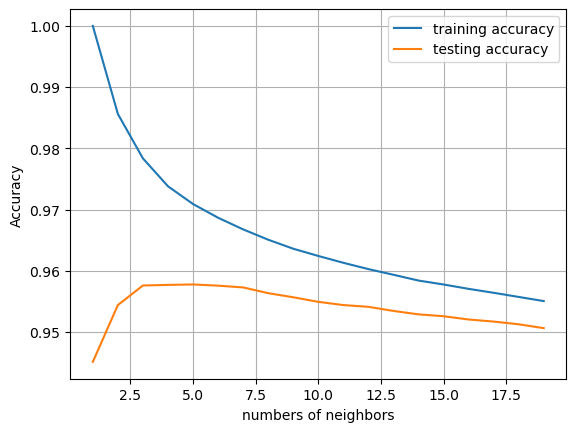

In [88]:
result_of_20_k = Best_knn(20)

In [89]:
#Let's choose 7 as the number of neighbors.
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [90]:
Evaluation(x_train_scaled, y_train, knn)

mean_absolute_error :  364.2100857142857
mean_squared_error  :  532585.3135282798
root_mean_absolute_error 729.7844294915312
R2_score            :  0.9667673714664806


In [91]:
Evaluation(x_test_scaled, y_test, knn)

mean_absolute_error :  419.20881904761904
mean_squared_error  :  678341.2695482994
root_mean_absolute_error 823.614757971407
R2_score            :  0.9572923137398679


In [92]:
#predict
y_pred_knn = knn.predict(x_test_scaled)

In [93]:
knn_score = metrics.r2_score(y_test, y_pred_knn)
knn_score

0.9572923137398679

Text(0.5, 0, 'y_test')

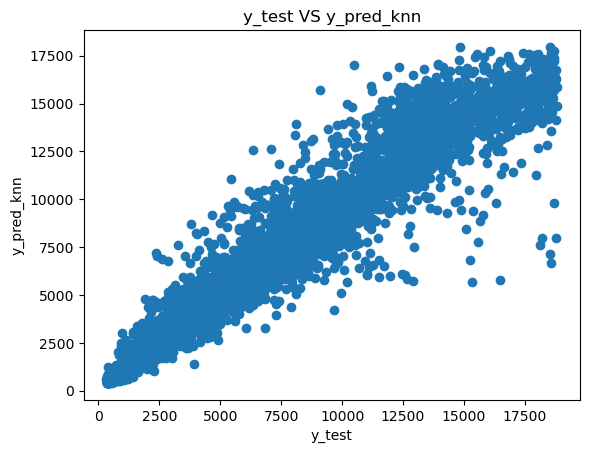

In [94]:
#compare
plt.scatter(y_test, y_pred_knn)
plt.title("y_test VS y_pred_knn")
plt.ylabel("y_pred_knn")
plt.xlabel("y_test")

In [95]:
#compareing model selection
compare_df = pd.DataFrame()

dict = {'linear': linear_score,
                           'poly' : poly_score,
                          'ridge': ridge_score,
                          'lasso': lasso_score,
                          'elastic': elastic_score,
                          'DTs': DTs_score,
                          'DTs_no_outlier': DTs_reg_without_outliers_score,
                          'RF': random_forest_score,
                          'KNN': knn_score}

compare_df.append(dict,ignore_index=True)

NameError: name 'poly_score' is not defined